### Make sure to Pip install the following libraries and the necessary ones too.

In [610]:
# pip install pandas-datareader
# pip install geopandasgr
# pip install mapclassify

In [611]:
import pandas as pd
from pandas_datareader import wb
import geopandas 
import matplotlib.pyplot as plt

In [612]:
data = wb.download(indicator='FP.CPI.TOTL.ZG', country='all',start=2020, end=2020)
data = data.reset_index(1)
data.columns = ['year','inflation']
data.head()

,year,inflation
country,,
Africa Eastern and Southern,2020,5.191456
Africa Western and Central,2020,2.431308
Arab World,2020,1.777408
Caribbean small states,2020,0.038521
Central Europe and the Baltics,2020,1.672441


In [613]:
world = geopandas.read_file(geopandas.datasets.get_path('naturalearth_lowres'))

In [614]:
pd.set_option('display.max_columns', 10)
pd.set_option('display.max_rows',300)
pd.set_option('display.width',1000)
world.head()

,pop_est,continent,name,iso_a3,gdp_md_est,geometry
0,28400000.0,Asia,Afghanistan,AFG,22270.0,"POLYGON ((61.21082 35.65007, 62.23065 35.27066..."
1,12799293.0,Africa,Angola,AGO,110300.0,"MULTIPOLYGON (((16.32653 -5.87747, 16.57318 -6..."
2,3639453.0,Europe,Albania,ALB,21810.0,"POLYGON ((20.59025 41.85540, 20.46318 41.51509..."
3,4798491.0,Asia,United Arab Emirates,ARE,184300.0,"POLYGON ((51.57952 24.24550, 51.75744 24.29407..."
4,40913584.0,South America,Argentina,ARG,573900.0,"MULTIPOLYGON (((-65.50000 -55.20000, -66.45000..."


In [615]:
world = world[world['name'] !='Antartica']

In [616]:
world = world.set_index('name')
world.head()

,pop_est,continent,iso_a3,gdp_md_est,geometry
name,,,,,
Afghanistan,28400000.0,Asia,AFG,22270.0,"POLYGON ((61.21082 35.65007, 62.23065 35.27066..."
Angola,12799293.0,Africa,AGO,110300.0,"MULTIPOLYGON (((16.32653 -5.87747, 16.57318 -6..."
Albania,3639453.0,Europe,ALB,21810.0,"POLYGON ((20.59025 41.85540, 20.46318 41.51509..."
United Arab Emirates,4798491.0,Asia,ARE,184300.0,"POLYGON ((51.57952 24.24550, 51.75744 24.29407..."
Argentina,40913584.0,South America,ARG,573900.0,"MULTIPOLYGON (((-65.50000 -55.20000, -66.45000..."


In [617]:
index_change = {"United States of America":'United States', "Russia":"Russian Federation"}

In [618]:
world = world.rename(index=index_change)

In [619]:
data = world.join(data, how="outer")
data.head()

,pop_est,continent,iso_a3,gdp_md_est,geometry,year,inflation
Afghanistan,28400000.0,Asia,AFG,22270.0,"POLYGON ((61.21082 35.65007, 62.23065 35.27066...",2020,NaN
Africa Eastern and Southern,NaN,NaN,NaN,NaN,None,2020,5.191456
Africa Western and Central,NaN,NaN,NaN,NaN,None,2020,2.431308
Albania,3639453.0,Europe,ALB,21810.0,"POLYGON ((20.59025 41.85540, 20.46318 41.51509...",2020,1.620887
Algeria,34178188.0,Africa,DZA,232900.0,"POLYGON ((11.99951 23.47167, 8.57289 21.56566,...",2020,2.415131


### Mapping the countries with their respective Inflation rates below.

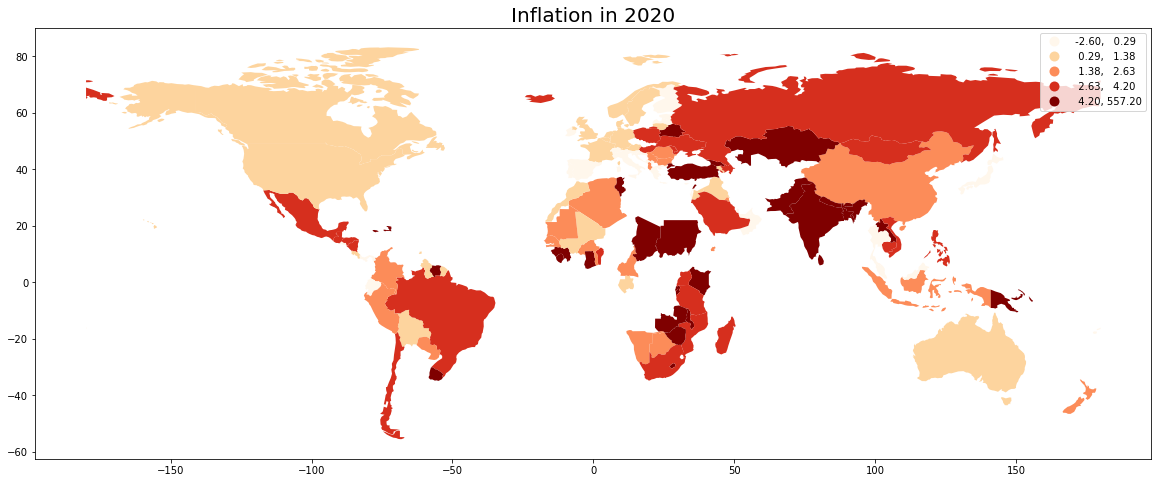

In [620]:
data.plot('inflation', cmap='OrRd', scheme='quantiles', legend=True, figsize=(20,15))
plt.title("Inflation in 2020", fontsize=20)
plt.show()

### Adding Grey tone to countries that are not Mapped, basically they are NAN values.

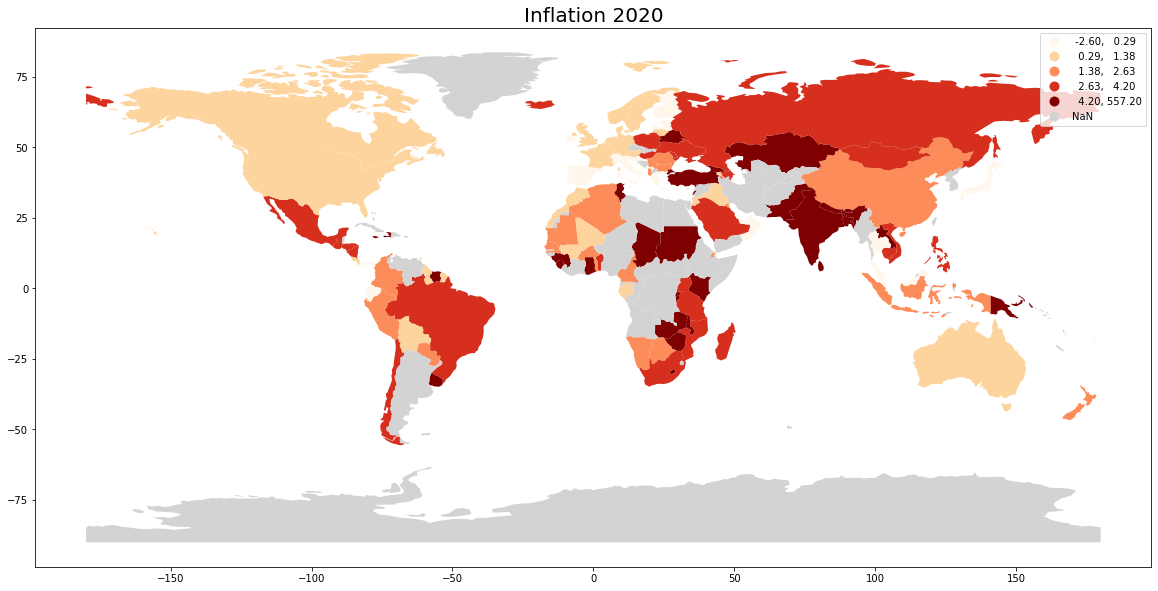

In [623]:
data.plot('inflation', cmap='OrRd', scheme='quantiles',
          missing_kwds={"color": "lightgrey"},
          legend=True, figsize=(20,15))
plt.title("Inflation 2020", fontsize=20)
plt.show()